In [48]:
##### Problem 1
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# simulate BM path
N1 = 3650
zt1 = np.cumsum(np.random.normal(size=N1-1) * np.sqrt(1/N1))
zt1 = np.insert(zt1,0,0)

In [50]:
# geometric BM function
def gbm(t, wt, mu, sigma, s0=1):
    return s0 * np.exp( sigma*wt + (mu - 1/2*sigma**2)*t )

In [53]:
# simulate geometric BM path
mu = 0.06
sigma = 0.2
times1 = [0+i*(1/N1) for i in range(1,N1+1)]
times1.insert(0,0)
st1 = [gbm(times1[t], zt1[t], mu, sigma) for t in range(N1)]

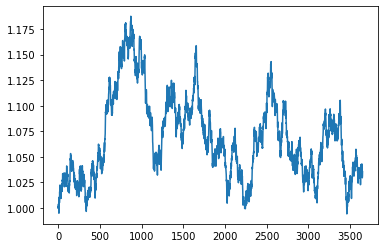

In [54]:
plt.plot(st1)

In [55]:
# daily continuously compounded returns
rt1 = np.diff(np.log(st1))

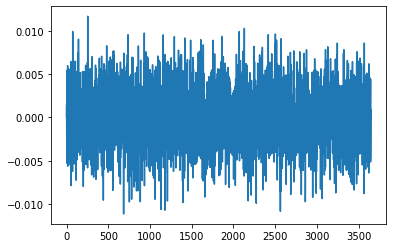

In [56]:
plt.plot(rt1)

In [57]:
rt1_ymean = 365*np.mean(rt1)
rt1_ystdv = np.sqrt(365)*np.std(rt1)
print("annualized mean of daily log-returns: ", rt1_ymean, "\nannualized standard deviation of daily log-returns: ", rt1_ystdv)

annualized mean of daily log-returns:  0.0034820340794422017 
annualized standard deviation of daily log-returns:  0.06364695422949575


In [47]:
##### Problem 2
import pandas as pd

In [58]:
idx = pd.period_range('1950-01-01','2020-12-31',freq='D')
N2 = len(idx)
zt2 = np.cumsum(np.random.normal(size=N2-1) * np.sqrt(1/N2))
zt2 = np.insert(zt2,0,0)
times2 = [0+i*(1/N2) for i in range(1,N2+1)]
times2.insert(0,0)
st2 = [gbm(times2[t], zt2[t], mu, sigma) for t in range(N2)]

In [59]:
st2 = pd.Series(st2,index=idx)
print('The sample has',N2,'observations.')

The sample has 25933 observations.


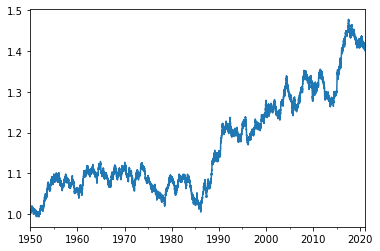

In [60]:
st2.plot()

In [61]:
st2_monavg = st2.resample(rule='M').mean()

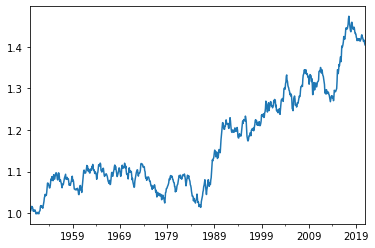

In [62]:
st2_monavg.plot()

In [85]:
##### Problem 3
## daily
import math
logret_d = st2.apply(math.log).diff()

In [89]:
## weekly
st2_w = st2.resample('w')
st2_w1 = st2_w.first()
logret_w = st2_w1.apply(math.log).diff()

In [90]:
## monthly
st2_m = st2.resample('m')
st2_m1 = st2_m.first()
logret_m = st2_m1.apply(math.log).diff()

In [94]:
print('Daily log returns summary statistics:\n', logret_d.describe())

Daily log returns summary statistics:
 count    25932.000000
mean         0.000013
std          0.001241
min         -0.005528
25%         -0.000820
50%          0.000013
75%          0.000857
max          0.005076
dtype: float64


In [95]:
print('Weekly log returns summary statistics:\n', logret_w.describe())

Weekly log returns summary statistics:
 count    3705.000000
mean        0.000092
std         0.003280
min        -0.010528
25%        -0.002090
50%         0.000075
75%         0.002256
max         0.011772
dtype: float64


In [96]:
print('Monthly log returns summary statistics:\n', logret_m.describe())

Monthly log returns summary statistics:
 count    851.000000
mean       0.000400
std        0.006758
min       -0.018967
25%       -0.004295
50%        0.000355
75%        0.004666
max        0.029889
dtype: float64
